In [89]:
#!pip install ensemble_boxes

In [90]:
import pandas as pd
from ensemble_boxes import *
import numpy as np
from pycocotools.coco import COCO
from tqdm import tqdm

In [91]:
# reference : https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/visualization/image.py
from core.visualization.image import imshow_det_bboxes

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
train/4047.jpg
[592, 229, 622, 278]
[408, 841, 597, 988]
[275, 381, 407, 626]
[322, 484, 446, 724]
[353, 371, 394, 422]
[0, 401, 71, 526]
[757, 311, 1023, 656]
[674, 486, 868, 781]
[651, 451, 712, 567]
[344, 133, 481, 315]
[508, 158, 598, 274]
[482, 158, 566, 268]
[441, 234, 600, 369]
[480, 277, 583, 368]
[507, 317, 597, 375]
[584, 320, 641, 370]
[359, 374, 404, 396]
[358, 358, 452, 387]
[358, 352, 452, 385]
[357, 350, 450, 382]
[356, 348, 450, 378]
[356, 342, 449, 370]
[355, 334, 448, 363]
[355, 332, 446, 356]
[354, 325, 445, 345]
[353, 323, 444, 342]
[352, 320, 443, 339]
[352, 317, 443, 337]
[351, 308, 442, 334]
[350, 307, 440, 329]
[350, 300, 443, 326]
[349, 295, 443, 322]
[348, 292, 442, 318]
[346, 289, 442, 315]
[346, 285, 440, 310]
[346, 280, 441, 305]
[345, 274, 439, 301]
[345, 250, 439, 291]
[345, 264, 439, 298]
[354, 328, 446, 351]
[618, 144, 745, 351]
[617, 312, 736, 531]
[592, 362, 632, 381]
[

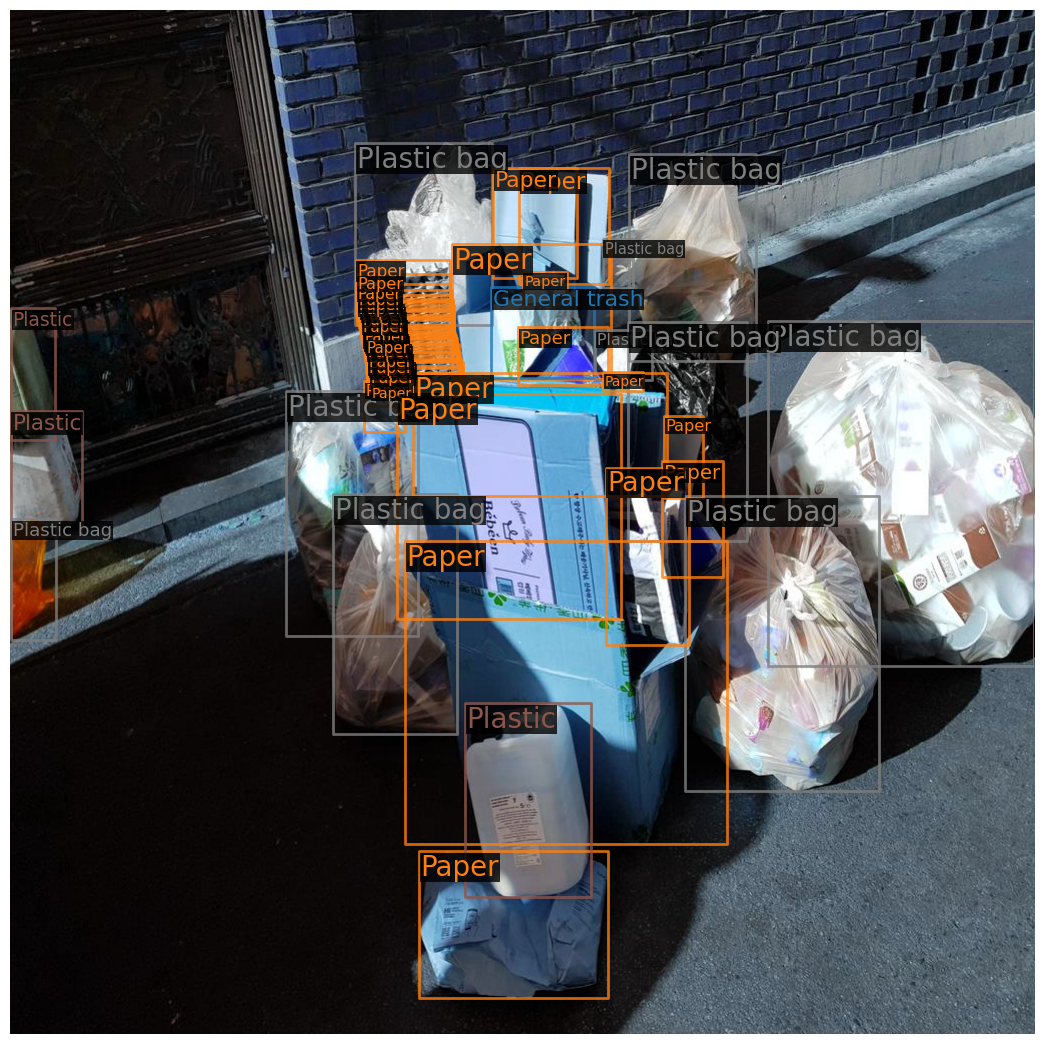

array([[[ 14,  19,  23],
        [  9,  14,  18],
        [  5,  10,  14],
        ...,
        [ 14,   7,   0],
        [ 32,  22,  10],
        [ 81,  69,  55]],

       [[  8,  11,  16],
        [  4,   7,  12],
        [  2,   5,  10],
        ...,
        [ 15,   8,   0],
        [ 35,  25,  13],
        [ 86,  74,  60]],

       [[  7,  10,  15],
        [  5,   8,  13],
        [  4,   7,  12],
        ...,
        [ 21,  12,   3],
        [ 50,  40,  28],
        [108,  96,  82]],

       ...,

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [103,  94,  79],
        [112, 103,  88],
        [115, 106,  91]],

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [104,  95,  80],
        [110, 101,  86],
        [111, 102,  87]],

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [111, 102,  87],
        [110, 101,  86],
        [102,  93,  78]]

In [92]:
import os
from PIL import Image
from pycocotools.coco import COCO
import pandas as pd; pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns

# image
img_dir = '/opt/ml/dataset/train'
img_file_name = '4047.jpg'
img_filepath_name = 'train/'
img_filepath_name += img_file_name
img_path = os.path.join(img_dir, img_file_name)  
img = Image.open(img_path)

# bbox
jsonfile_path = './train.json'
coco = COCO(jsonfile_path)

train_df = pd.DataFrame()

image_ids = []
class_name = []
class_id = []
x_min = []
y_min = []
x_max = []
y_max = []
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
for image_id in coco.getImgIds():
        
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_info['id'])
    anns = coco.loadAnns(ann_ids)
        
    file_name = image_info['file_name']
        
    for ann in anns:
        image_ids.append(file_name)
        class_name.append(classes[ann['category_id']])
        class_id.append(ann['category_id'])
        x_min.append(float(ann['bbox'][0]))
        y_min.append(float(ann['bbox'][1]))
        x_max.append(float(ann['bbox'][0]) + float(ann['bbox'][2]))
        y_max.append(float(ann['bbox'][1]) + float(ann['bbox'][3]))

train_df['image_id'] = image_ids
train_df['class_name'] = class_name
train_df['class_id'] = class_id
train_df['x_min'] = x_min
train_df['y_min'] = y_min
train_df['x_max'] = x_max
train_df['y_max'] = y_max

print(img_filepath_name)

annotations = (train_df.loc[train_df['image_id'] == img_filepath_name]).values.tolist()

labels = []
bboxes = []
for annotation in annotations:
    labels.append(int(annotation[2]))
    x_min = int(annotation[3])
    y_min = int(annotation[4])
    x_max = int(annotation[5])
    y_max = int(annotation[6])
    bboxes.append([x_min, y_min, x_max, y_max])

if(len(bboxes) == 0):
    quit    
    
color_list = sns.color_palette(n_colors = 10)

rgblist = []

for i, color in enumerate(color_list):
    for t, value in enumerate(color):
        rgblist.append(int(value * 255.0))
     
for i, box in enumerate(bboxes):
    print(box)

rgblist = np.array(rgblist).reshape(10, -10).tolist()

imshow_det_bboxes(img=np.array(img), bboxes=np.array(bboxes), labels=np.array(labels), class_names=classes, bbox_color=rgblist,
        text_color=rgblist,
        mask_color=rgblist, thickness = 2, font_size = 20)

샘플로 WBF저장하고 달라지는 annotation 확인

In [93]:
iou_thr = 0.1
skip_box_thr = 0.0001
sigma = 0.1

weights = 1
boxes_list = []
scores_list = []
labels_list = []

box_list = []
score_list = []

print(len(bboxes))

for i, box in enumerate(bboxes):
    nbox = [0,0,0,0]
    nbox[0] = float(box[0]) / image_info['width']
    nbox[1] = float(box[1]) / image_info['height']
    nbox[2] = float(box[2]) / image_info['width']
    nbox[3] = float(box[3]) / image_info['height']
    box_list.append(nbox)

boxes_list.append(box_list)
labels_list.append(labels)
scores_list.append(np.ones(len(labels_list[0])).tolist())

# hard NMS
#wboxes, wscores, wlabels = nms(boxes_list, scores_list, labels_list, iou_thr=iou_thr)
#boxes, scores, labels = nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr)
# soft NMS
#boxes, scores, labels = soft_nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, sigma=sigma, thresh=skip_box_thr)
# NMW
#boxes, scores, labels = non_maximum_weighted(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
# WBF
wboxes, wscores, wlabels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=None, iou_thr=iou_thr, skip_box_thr=skip_box_thr)

52


In [94]:
wbox_list = []
wlabels_list = []
for i, box in enumerate(wboxes):
    nbox = [0,0,0,0]
    nbox[0] = int(box[0] * image_info['width'])
    nbox[1] = int(box[1] * image_info['height'])
    nbox[2] = int(box[2] * image_info['width'])
    nbox[3] = int(box[3] * image_info['height'])
    wbox_list.append(nbox)
    wlabels_list.append(int(wlabels[i]))
    

In [95]:
print("before preprocessing # of label ", len(labels_list[0]))
print("after preprocessing # of label ", len(wlabels_list))

before preprocessing # of label  52
after preprocessing # of label  24


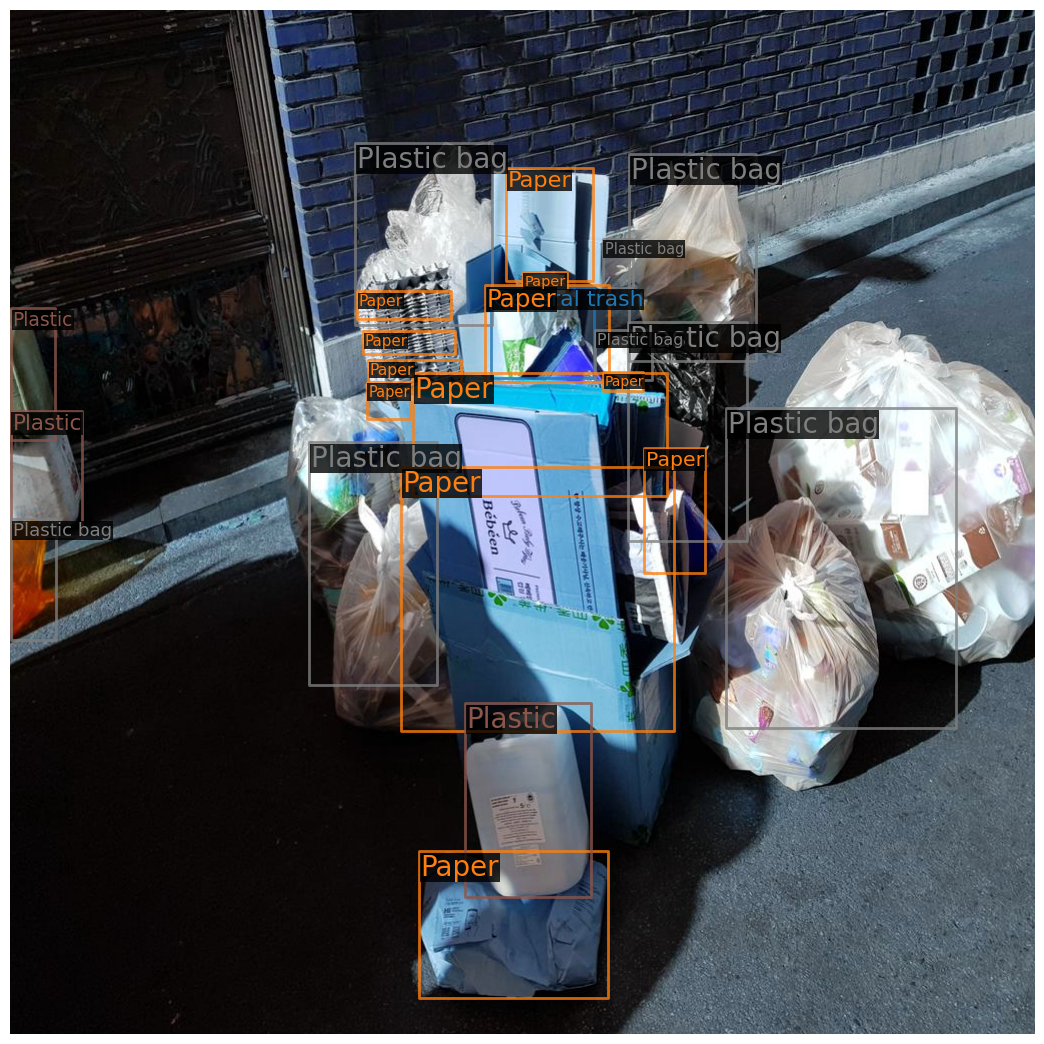

array([[[ 14,  19,  23],
        [  9,  14,  18],
        [  5,  10,  14],
        ...,
        [ 14,   7,   0],
        [ 32,  22,  10],
        [ 81,  69,  55]],

       [[  8,  11,  16],
        [  4,   7,  12],
        [  2,   5,  10],
        ...,
        [ 15,   8,   0],
        [ 35,  25,  13],
        [ 86,  74,  60]],

       [[  7,  10,  15],
        [  5,   8,  13],
        [  4,   7,  12],
        ...,
        [ 21,  12,   3],
        [ 50,  40,  28],
        [108,  96,  82]],

       ...,

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [103,  94,  79],
        [112, 103,  88],
        [115, 106,  91]],

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [104,  95,  80],
        [110, 101,  86],
        [111, 102,  87]],

       [[  5,   5,   7],
        [  5,   5,   7],
        [  4,   4,   6],
        ...,
        [111, 102,  87],
        [110, 101,  86],
        [102,  93,  78]]

In [96]:
imshow_det_bboxes(img=np.array(img), bboxes=np.array(wbox_list), labels=np.array(wlabels_list), class_names=classes, bbox_color=rgblist,
        text_color=rgblist,
        mask_color=rgblist, thickness = 2, font_size = 20)

모든 annotation box에 대해 WBF로 전처리 수행해서 dataframe으로 저장

In [97]:
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

def coord2ratio(boxes, width, height):
    nbox_list = []
    for box in boxes:
        nbox = [0,0,0,0]
        nbox[0] = float(box[0]) / width
        nbox[1] = float(box[1]) / height
        nbox[2] = float(box[2]) / width
        nbox[3] = float(box[3]) / height
        nbox_list.append(nbox)

    return nbox_list

def ratio2coord(boxes, width, height):
    nbox_list = []
    for box in boxes:
        nbox = [0,0,0,0]
        nbox[0] = int(box[0] * width)
        nbox[1] = int(box[1] * height)
        nbox[2] = int(box[2] * width)
        nbox[3] = int(box[3] * height)
        nbox_list.append(nbox)

    return nbox_list

def prepro4sameimage(sameimg_annotation_list, image_info):
    ratioboxes_list = []
    labels_list = []
    scores_list = []

    sameimg_annotation_list = np.reshape(sameimg_annotation_list, (-1, 7))
    len = sameimg_annotation_list.shape[0]
    
    ratioboxes_list.append(coord2ratio(sameimg_annotation_list[:, 3:7].tolist(), image_info['width'], image_info['height']))
    
    labels_list.append(list(map(int, sameimg_annotation_list[:, 2].tolist())))
    scores_list.append(np.ones(len).tolist())
    
    wboxes_list, wscores_list, wlabels_list = weighted_boxes_fusion(ratioboxes_list, scores_list, labels_list, weights=None, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
    wcoordboxes_list = ratio2coord(wboxes_list, image_info['width'], image_info['height'])

    image_id_list = []
    classes_id_list = []
    classes_name_list = []
    x_min_list = []
    y_min_list = []
    x_max_list = []
    y_max_list = []
    for i, wcoordboxes in enumerate(wcoordboxes_list):
        image_id_list.append(sameimg_annotation_list[0][0])
        class_id = int(wlabels_list[i])
        classes_id_list.append(class_id)
        classes_name_list.append(classes[class_id])
        x_min_list.append(wcoordboxes[0])
        y_min_list.append(wcoordboxes[1])
        x_max_list.append(wcoordboxes[2])
        y_max_list.append(wcoordboxes[3])   

    return image_id_list, classes_name_list, classes_id_list, x_min_list, y_min_list, x_max_list, y_max_list 

def preproannotion(allannotations, image_info):
    stack = []
    cnt = 0
    image_id_list = []
    class_name_list = [] 
    class_id_list = []
    x_min_list = []
    y_min_list = []
    x_max_list = []
    y_max_list = []

    i = 0
    
    while i < len(allannotations):
        
        stack.append(allannotations[i])
        cnt += 1
        previmage_id = allannotations[i][0]
        i = i + 1

        # push all annotations related to the same image
        while (i < len(allannotations)) and (previmage_id == allannotations[i][0]):
            stack.append(allannotations[i])
            cnt += 1
            previmage_id = allannotations[i][0]
            i = i + 1
        
        if (cnt > 1): # multiple annotations on the single image
            image_id, class_name, class_id, x_min, y_min, x_max, y_max = prepro4sameimage(stack, image_info)
            stack = []
            cnt = 0

            image_id_list.extend(image_id)
            class_name_list.extend(class_name)
            class_id_list.extend(class_id)
            x_min_list.extend(x_min)
            y_min_list.extend(y_min)
            x_max_list.extend(x_max)
            y_max_list.extend(y_max)
        else: # single annotation on the single image
            top = stack.pop()
            stack = []
            cnt = 0
            
            image_id = top[0]
            class_name = classes[top[2]]
            class_id = top[2]
            x_min = top[3]
            y_min = top[4]
            x_max = top[5]
            y_max = top[6]
            
            image_id_list.append(image_id)
            class_name_list.append(class_name)
            class_id_list.append(class_id)
            x_min_list.append(x_min)
            y_min_list.append(y_min)
            x_max_list.append(x_max)
            y_max_list.append(y_max)

    return image_id_list, class_name_list, class_id_list, x_min_list, y_min_list, x_max_list, y_max_list

In [98]:
allannotations = train_df.values.tolist()
image_id_list, class_name_list, class_id_list, x_min_list, y_min_list, x_max_list, y_max_list = preproannotion(allannotations, image_info)

In [99]:
prepro_df = pd.DataFrame()

prepro_df['image_id'] = image_id_list
prepro_df['class_name'] = class_name_list
prepro_df['class_id'] = class_id_list
prepro_df['x_min'] = x_min_list
prepro_df['y_min'] = y_min_list
prepro_df['x_max'] = x_max_list
prepro_df['y_max'] = y_max_list

In [100]:
prepro_df.head(10)

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,train/0000.jpg,General trash,0,197.6,193.7,745.4,663.4
1,train/0001.jpg,General trash,0,425.0,681.0,641.0,861.0
2,train/0001.jpg,General trash,0,622.0,686.0,695.0,780.0
3,train/0001.jpg,Plastic,5,353.0,671.0,586.0,774.0
4,train/0001.jpg,Plastic,5,3.0,448.0,781.0,690.0
5,train/0001.jpg,Glass,4,722.0,313.0,996.0,565.0
6,train/0001.jpg,Plastic bag,7,0.0,455.0,144.0,637.0
7,train/0001.jpg,Plastic bag,7,92.0,601.0,231.0,654.0
8,train/0001.jpg,Metal,3,0.0,407.0,57.0,588.0
9,train/0002.jpg,Metal,3,267.9,165.2,899.5,678.2


In [101]:
train_df.head(10)

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,train/0000.jpg,General trash,0,197.6,193.7,745.4,663.4
1,train/0001.jpg,Metal,3,0.0,407.4,57.6,588.0
2,train/0001.jpg,Plastic bag,7,0.0,455.6,144.6,637.2
3,train/0001.jpg,Glass,4,722.3,313.4,996.6,565.3
4,train/0001.jpg,Plastic,5,353.2,671.0,586.9,774.4
5,train/0001.jpg,Plastic,5,3.7,448.5,781.9,690.5
6,train/0001.jpg,General trash,0,425.3,681.9,641.7,861.7
7,train/0001.jpg,Plastic bag,7,92.4,601.7,231.6,654.8
8,train/0001.jpg,General trash,0,622.4,686.5,695.2,780.7
9,train/0002.jpg,Metal,3,267.9,165.2,899.5,678.2


In [102]:
prepro_df.tail(10)

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
18266,train/4879.jpg,Plastic,5,160.0,441.0,346.0,674.0
18267,train/4880.jpg,General trash,0,193.3,209.2,769.7,846.6
18268,train/4881.jpg,Paper,1,279.0,459.0,443.0,567.0
18269,train/4881.jpg,Plastic bag,7,114.0,45.0,866.0,518.0
18270,train/4881.jpg,Plastic bag,7,724.0,69.0,769.0,111.0
18271,train/4881.jpg,Plastic bag,7,151.0,484.0,691.0,858.0
18272,train/4882.jpg,Paper,1,200.0,358.0,546.0,634.0
18273,train/4882.jpg,General trash,0,511.0,451.0,570.0,481.0
18274,train/4882.jpg,Plastic bag,7,302.0,439.0,567.0,655.0
18275,train/4882.jpg,Plastic,5,0.0,116.0,944.0,930.0


In [103]:
train_df.tail(10)

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
23134,train/4880.jpg,General trash,0,193.3,209.2,769.7,846.6
23135,train/4881.jpg,Plastic bag,7,114.5,45.2,866.2,518.1
23136,train/4881.jpg,Plastic bag,7,724.0,69.1,769.0,111.8
23137,train/4881.jpg,Paper,1,279.0,459.7,443.6,567.9
23138,train/4881.jpg,Plastic bag,7,151.4,484.8,691.5,858.9
23139,train/4882.jpg,Plastic,5,0.0,116.2,944.1,930.3
23140,train/4882.jpg,Plastic bag,7,302.1,439.3,567.3,655.4
23141,train/4882.jpg,General trash,0,511.3,451.1,570.0,481.3
23142,train/4882.jpg,Paper,1,255.0,421.4,526.7,616.5
23143,train/4882.jpg,Paper,1,145.4,295.4,565.6,651.5
